## 1. Imports

In [335]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree

from sklearn.datasets import load_iris

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 2. Load Data

In [336]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

columns = ["price","maintenance","doors","persons","luggage_booth","safety","class"]
df = pd.read_csv(car_data, header=None, names=columns)
df

,price,maintenance,doors,persons,luggage_booth,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## 3. Process / Convert the data into unique numerical values

In [337]:
df['price'] = df['price'].replace(to_replace=['vhigh','high','med','low'], value=[4,3,2,1])
df['maintenance'] = df['maintenance'].replace(to_replace=['vhigh','high','med','low'], value=[4,3,2,1])
df['doors'] = df['doors'].replace(to_replace=['5more'], value=[6])
df['persons'] = df['persons'].replace(to_replace=['more'], value=[5])
df['luggage_booth'] = df['luggage_booth'].replace(to_replace=['small','med','big'], value=[1,2,3])
df['safety'] = df['safety'].replace(to_replace=['low','med','high'], value=[1,2,3])
df['class'] = df['class'].replace(to_replace=['unacc','acc','good','vgood'], value=[1,2,3,4])
df

,price,maintenance,doors,persons,luggage_booth,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,6,5,2,2,3
1724,1,1,6,5,2,3,4
1725,1,1,6,5,3,1,1
1726,1,1,6,5,3,2,3


## 4. Split the data: attributes X + output class y

In [338]:
# convert to numpy
cars = df.values
X, y = cars[:, :-1], cars[:, -1]
X, y = X.astype(int), y.astype(int) # convert to integer

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

## 5. Decision Tree Classifier

### a) Car evaluation dataset

In [339]:
dt_clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=11) # max_depth = 11 for max score
# dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=22)

dt_clf = dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9826589595375722

In [ ]:
# plt.figure(figsize=(30, 30))
# plot_tree(dt_clf,
#           filled=True,
#           rounded=True,
#           class_names=["price","maintenance","doors","persons","luggage_booth","safety","class"],
#          feature_names=df.columns)

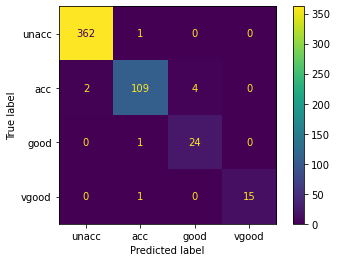

In [340]:
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

### b) Iris dataset

In [342]:
# load the data + process the data
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

# split the data
flowers = df_iris.values
Xf, yf = flowers[:, :-1], flowers[:, -1]
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=0, test_size=0.3)

# run through DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=11)
dt_clf = dt_clf.fit(Xf_train, yf_train)
dt_clf.score(Xf_test, yf_test)

0.9777777777777777

## 6. Random Forest Classifier

### a) Car evaluation dataset

In [341]:
# max_depth=13 + n_estimators=70 for max score 0.984585...
clf = RandomForestClassifier(n_estimators=70, criterion='gini', max_depth=13, 
            random_state=0, max_features='auto', #class_weight='balanced',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, # default values
            oob_score=True)
# max_features='auto' => sqrt(n_features)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9845857418111753

In [ ]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [347]:
# MinMaxScaler()

mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.fit_transform(X_test)

clf.fit(X_train_scaled, y_train)
clf.score( X_test_scaled, y_test)

0.9826589595375722

In [349]:
# Standard Scaler()

scaler = StandardScaler()
X_train_sscaled = scaler.fit_transform(X_train)
X_test_sscaled = scaler.fit_transform(X_test)

clf.fit(X_train_sscaled, y_train)
clf.score( X_test_sscaled, y_test)

0.9826589595375722

In [348]:
# PCA()

pca = PCA(n_components=6)

pca_cars_train = pca.fit_transform(X_train)
pca_cars_test = pca.transform(X_test)

clf.fit(pca_cars_train, y_train)
predictions = clf.predict(pca_cars_test)
(predictions == y_test).sum()/len(y_test)

0.9614643545279383

### b) Iris dataset

In [343]:
# Random Forest Classifier

clf = clf.fit(Xf_train, yf_train)
clf.score(Xf_test, yf_test)

0.9777777777777777

In [344]:
# MinMaxScaler()

mm_scaler = MinMaxScaler()
Xf_train_scaled = mm_scaler.fit_transform(Xf_train)
Xf_test_scaled = mm_scaler.fit_transform(Xf_test)

clf.fit(Xf_train_scaled, yf_train)
clf.score( Xf_test_scaled, yf_test)

0.8666666666666667

In [345]:
# Standard Scaler()

scaler = StandardScaler()
Xf_train_scaledd = scaler.fit_transform(Xf_train)
Xf_test_scaledd = scaler.fit_transform(Xf_test)

clf.fit(Xf_train_scaledd, yf_train)
clf.score( Xf_test_scaledd, yf_test)

0.8888888888888888

In [346]:
# PCA()

pca = PCA(n_components=2)

pca_flowers_train = pca.fit_transform(Xf_train)
pca_flowers_test = pca.transform(Xf_test)

clf.fit(pca_flowers_train, yf_train)
predictions = clf.predict(pca_flowers_test)
(predictions == yf_test).sum()/len(yf_test)

0.9777777777777777